# Analysis of User Reviews from Rotten Tomatoes Pt. 2/2

Welcome to pt. 2 of my analysis notebook for RT user reviews! In pt. 1, I went through Analyses 1-2: splitting the reviews into positive and negative, and running keyness/frequency/concordance analysis on those groups of reviews for both movies. 

In this notebook, I will be going through the rest of my analyses (sentiment analysis):

3. VADER
4. NRC VAD Lexicon
5. NRC Emotion Lexicon

## Analysis pt. 3: Using VADER for sentiment analysis

The first part here will be to use VADER (Valence Aware Dictionary and sEntiment Reasoner), which is a lexicon and rule-based sentiment analysis tool that tells us how positive or negative the sentiment of a certain word is.

Quickly running the first two cells to set up this notebook, and also loading in the review data:

In [1]:
import json
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

In [2]:
chars_to_remove = '.,!?/()'

In [3]:
%run functions.ipynb

In [4]:
rt_host_user = json.load(open('../data/user_reviews/tomatoes_host_user.json'))

In [5]:
rt_parasite_user = json.load(open('../data/user_reviews/tomatoes_parasite_user.json'))

In [6]:
sid = SentimentIntensityAnalyzer()

In [7]:
words_to_remove = ['monster','virus','expand','host','movie','kill','Expand','parasite','movie','sucks',
    'poor','struggles','hard','horror','military','government','black','shot','violent','violence','warfare',
    'money', 'poverty','inequality','foreign','hype','creature','mutant','beast','lower','mother','waste']

### Is the mean sentiment score more positive (higher score) for _Parasite_ than _The Host_ ?

### For user reviews of _The Host_ :

Initializing and using VADER for sentiment analysis on the user reviews for each movie, starting with _The Host_

In [8]:
for review in rt_host_user:
    tokens = tokenize(review['text'], lowercase=True, strip_chars=chars_to_remove)
    filtered_tokens = [t for t in tokens if t not in words_to_remove]
    review['tokens']=filtered_tokens

In [9]:
rt_host_user[0]

{'date': 'Dec 30, 2009',
 'score': 3.5,
 'text': 'For a monster movie this was quite good. Decent special effects and good acting all around. I feel that the aspect of military involvement and the supposed virus scare was never really expanded upon properly, leaving lots of "why?" when the credits role. Overall a great overseas horror flick, and I gotta say it\'s good to see something from that part of te globe where te main antagonist is NOT a woman with long black hair hanging in front of her face :)',
 'tokens': ['for',
  'a',
  'this',
  'was',
  'quite',
  'good',
  'decent',
  'special',
  'effects',
  'and',
  'good',
  'acting',
  'all',
  'around',
  'i',
  'feel',
  'that',
  'the',
  'aspect',
  'of',
  'involvement',
  'and',
  'the',
  'supposed',
  'scare',
  'was',
  'never',
  'really',
  'expanded',
  'upon',
  'properly',
  'leaving',
  'lots',
  'of',
  '"why"',
  'when',
  'the',
  'credits',
  'role',
  'overall',
  'a',
  'great',
  'overseas',
  'flick',
  'and',

Using the Sentiment Intensity Analyzer to go through the text of each review and update it by adding the sentiment scores:

In [10]:
for review in rt_host_user:
    text = ' '.join(review['tokens'])
    scores = sid.polarity_scores(text)
    review.update(scores)

In [11]:
text

'forget every you have ever seen: the wins hands down funny poignant and exciting this is more about the dysfunctional family that combat the mutated fish thingy rather than the itself similar in style to q: the winged serpent this nevertheless has a unique style especially with the colour-saturated tones and the unorthodox way they show the in the first ten minutes of the film i did think they could have dissed the yanks more for the pollutuon of their river though awesome: i insist that everyone see this fantastic immediately zfk maximum rating'

Now, for each dictionary (representing each user review) in our list, there will be information on the sentiment scores that we got using VADER. We will have the compound sentiment score, the negative sentiment score, positive sentiment score, in addition to the information we already had in each of our reviews.

In [12]:
rt_host_user[0]

{'compound': 0.9192,
 'date': 'Dec 30, 2009',
 'neg': 0.069,
 'neu': 0.714,
 'pos': 0.217,
 'score': 3.5,
 'text': 'For a monster movie this was quite good. Decent special effects and good acting all around. I feel that the aspect of military involvement and the supposed virus scare was never really expanded upon properly, leaving lots of "why?" when the credits role. Overall a great overseas horror flick, and I gotta say it\'s good to see something from that part of te globe where te main antagonist is NOT a woman with long black hair hanging in front of her face :)',
 'tokens': ['for',
  'a',
  'this',
  'was',
  'quite',
  'good',
  'decent',
  'special',
  'effects',
  'and',
  'good',
  'acting',
  'all',
  'around',
  'i',
  'feel',
  'that',
  'the',
  'aspect',
  'of',
  'involvement',
  'and',
  'the',
  'supposed',
  'scare',
  'was',
  'never',
  'really',
  'expanded',
  'upon',
  'properly',
  'leaving',
  'lots',
  'of',
  '"why"',
  'when',
  'the',
  'credits',
  'role'

Adding a key-value pair into the dict for average token sentiment scores for each review:

In [13]:
for review in rt_host_user:
    avg = sum([sid.lexicon.get(tok.lower(),0) for tok in review['tokens']])/len(rt_host_user)
    review['average'] = avg

In [14]:
rt_host_user[0]

{'average': 0.0016271884654994852,
 'compound': 0.9192,
 'date': 'Dec 30, 2009',
 'neg': 0.069,
 'neu': 0.714,
 'pos': 0.217,
 'score': 3.5,
 'text': 'For a monster movie this was quite good. Decent special effects and good acting all around. I feel that the aspect of military involvement and the supposed virus scare was never really expanded upon properly, leaving lots of "why?" when the credits role. Overall a great overseas horror flick, and I gotta say it\'s good to see something from that part of te globe where te main antagonist is NOT a woman with long black hair hanging in front of her face :)',
 'tokens': ['for',
  'a',
  'this',
  'was',
  'quite',
  'good',
  'decent',
  'special',
  'effects',
  'and',
  'good',
  'acting',
  'all',
  'around',
  'i',
  'feel',
  'that',
  'the',
  'aspect',
  'of',
  'involvement',
  'and',
  'the',
  'supposed',
  'scare',
  'was',
  'never',
  'really',
  'expanded',
  'upon',
  'properly',
  'leaving',
  'lots',
  'of',
  '"why"',
  'wh

### For user reviews of _Parasite_ :

In order to compare sentiment scores between user reviews of the two movies, we also need to carry out the same steps above, but with our list of reviews of _Parasite_ :

In [15]:
for review in rt_parasite_user:
    tokens = tokenize(review['text'], lowercase=True, strip_chars=chars_to_remove)
    filtered_tokens = [t for t in tokens if t not in words_to_remove]
    review['tokens']=filtered_tokens

In [16]:
rt_parasite_user[0]

{'date': 'May 1, 2021',
 'score': 5,
 'text': "Watch it!!!!!!! I don't need to say a word, just trust me.",
 'tokens': ['watch',
  'it',
  'i',
  "don't",
  'need',
  'to',
  'say',
  'a',
  'word',
  'just',
  'trust',
  'me']}

Doing the same thing we did for reviews of _The Host_ , we are going to go through each review in our list, and find the sentiment scores using the Sentiment Intensity Analyzer through VADER, and then update each review to include this information we got with the sentiment analysis:

In [17]:
for review in rt_parasite_user:
    text = ' '.join(review['tokens'])
    scores = sid.polarity_scores(text)
    review.update(scores)

In [18]:
rt_parasite_user[0]

{'compound': 0.5106,
 'date': 'May 1, 2021',
 'neg': 0.0,
 'neu': 0.732,
 'pos': 0.268,
 'score': 5,
 'text': "Watch it!!!!!!! I don't need to say a word, just trust me.",
 'tokens': ['watch',
  'it',
  'i',
  "don't",
  'need',
  'to',
  'say',
  'a',
  'word',
  'just',
  'trust',
  'me']}

Adding a key-value pair into the dict for average token sentiment scores for each review:

In [19]:
for review in rt_parasite_user:
    avg = sum([sid.lexicon.get(tok.lower(),0) for tok in review['tokens']])/len(rt_parasite_user)
    review['average'] = avg

In [20]:
rt_parasite_user[0]

{'average': 0.0005216602404173282,
 'compound': 0.5106,
 'date': 'May 1, 2021',
 'neg': 0.0,
 'neu': 0.732,
 'pos': 0.268,
 'score': 5,
 'text': "Watch it!!!!!!! I don't need to say a word, just trust me.",
 'tokens': ['watch',
  'it',
  'i',
  "don't",
  'need',
  'to',
  'say',
  'a',
  'word',
  'just',
  'trust',
  'me']}

In [21]:
# Length of each list of reviews:

print(len(rt_host_user))
print(len(rt_parasite_user))

4855
4409


We've carried out the sentiment analysis using VADER, but we're not done quite yet! I'm going to take our results and compare the mean compound sentiment scores for the list of user reviews of each movie, and we can gain a better sense of whether or not the reviews of one movie were more positive than those of the other movie:

In [22]:
sum([review['compound'] for review in rt_host_user])/ len(rt_host_user)

0.4362231101956738

In [23]:
sum([review['compound'] for review in rt_parasite_user])/ len(rt_parasite_user)

0.5087036743025616

Displaying the results in a plot:

In [24]:
host_cs = [review['compound'] for review in rt_host_user]
parasite_cs = [review['compound'] for review in rt_parasite_user]


In [25]:
# an improved way to do the plots - first create a data frame
# with a row for each score with a label column
polarity_df=pd.concat(
        [  pd.DataFrame({'Polarity Score': host_cs, 'label': 'The Host'}),
           pd.DataFrame({'Polarity Score': parasite_cs, 'label': 'Parasite'})  ]
)

polarity_df.head()

,Polarity Score,label
0,0.9192,The Host
1,0.2249,The Host
2,-0.9522,The Host
3,0.9055,The Host
4,0.8807,The Host


Text(0.5, 0, 'Movie')

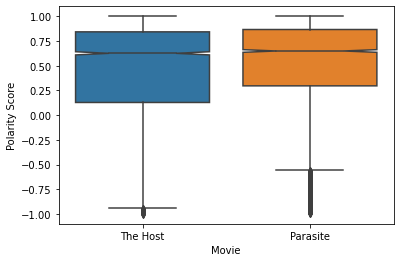

In [26]:
sns.boxplot(data=polarity_df, x='label', y='Polarity Score', notch=True)
plt.xlabel('Movie')

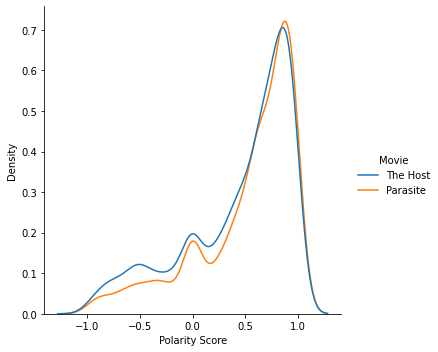

In [27]:
g=sns.displot(data=polarity_df, x='Polarity Score', hue='label', kind='kde')
g.legend.set_title('Movie')

### Observations

* Pretty similar but generally, there seems to be more negative reviews of _The Host_ than _Parasite_
* VADER isn't the best option to use for carrying out sentiment analysis, mainly because it's specifically attuned to sentiments expressed on social media (short and quick, not too much depth). 
* It's worth looking at other lexicons for sentiment analysis, especially because VADER only looks at each specific word and completely fails to consider the context. It doesn't take into account the nuances of our emotions when we're writing, so another lexicon can be more helpful for capturing more accurately the valence of emotions used throughout texts.

With that, let's move onto Part 4, using the NRC Lexicon~

## Analysis pt. 4: Using NRC Lexicon for sentiment analysis

### NRC VAD Lexicon

* VAD = Valence Arousal Dominance

Words play a central role in language and thought. Several influential factor analysis studies have shown that the primary dimensions of word meaning are valence, arousal, and dominance (VAD) (Osgood et al., 1957; Russell, 1980, 2003).

* **valence** is the positive--negative or pleasure--displeasure dimension;
* **arousal** is the excited--calm or active--passive dimension; and
* **dominance** is the powerful--weak or 'have full control'--'have no control' dimension.

The NRC Valence, Arousal, and Dominance (VAD) Lexicon includes a list of more than 20,000 English words and their valence, arousal, and dominance scores. For a given word and a dimension (V/A/D), the scores range from 0 (lowest V/A/D) to 1 (highest V/A/D). The lexicon with its fine-grained real-valued scores was created by manual annotation using Best--Worst Scaling. The lexicon is markedly larger than any of the existing VAD lexicons. We also show that the ratings obtained are substantially more reliable than those in existing lexicons. (See associated paper for details.)

In [28]:
NRC_VAD_lexicon = open('../data/lexicons/NRC-VAD-Lexicon.txt').readlines()

Looking at the length of the lexicon (how many words are in it), and then displaying a sample slice of the words, showing the VAD scores:

In [29]:
len(NRC_VAD_lexicon)

20008

In [30]:
for line in NRC_VAD_lexicon[:25]:
    print(line.strip())

Word	Valence	Arousal	Dominance
aaaaaaah	0.479	0.606	0.291
aaaah	0.520	0.636	0.282
aardvark	0.427	0.490	0.437
aback	0.385	0.407	0.288
abacus	0.510	0.276	0.485
abalone	0.500	0.480	0.412
abandon	0.052	0.519	0.245
abandoned	0.046	0.481	0.130
abandonment	0.128	0.430	0.202
abashed	0.177	0.644	0.307
abate	0.255	0.696	0.604
abatement	0.388	0.338	0.336
abba	0.562	0.500	0.480
abbey	0.580	0.367	0.444
abbot	0.427	0.321	0.483
abbreviate	0.531	0.375	0.330
abbreviation	0.469	0.306	0.345
abdomen	0.469	0.462	0.471
abdominal	0.490	0.456	0.445
abduct	0.173	0.720	0.615
abduction	0.062	0.990	0.673
aberrant	0.146	0.765	0.431
aberration	0.125	0.816	0.417
abeyance	0.330	0.510	0.292


Creating a dictionary from the text file to make it easier to work with: 

In [31]:
NRC_VAD = {}

# first line in list is the header so slice from second item in list
for line in NRC_VAD_lexicon[1:]:  
    word, V,A,D = line.strip().split('\t')
    NRC_VAD[word] = {'V': float(V), 
                     'A': float(A),
                     'D': float(D)}
    

In [32]:
# Example:
NRC_VAD['surprised']

{'A': 0.855, 'D': 0.539, 'V': 0.784}

In [33]:
NRC_VAD['violent']

{'A': 0.918, 'D': 0.616, 'V': 0.112}

Writing a new function to process each review in my two lists to add the VAD scores to each one:

In [34]:
def process_review(review):
    
    tokens = tokenize(review['text'], lowercase=True, strip_chars=chars_to_remove)
    filtered_tokens = [t for t in tokens if t not in words_to_remove]
    review['tokens']=filtered_tokens
    
    
    review['Valence']=0
    review['Dominance']=0
    review['Arousal']=0
    
    review['VAD_toks']=[]
    
    for token in filtered_tokens:
        if token in NRC_VAD.keys():
            scores = NRC_VAD[token]
            scores['tok']=token
            
            review['Valence']+=scores['V']
            review['Arousal']+=scores['A']
            review['Dominance']+=scores['D']
            
            review['VAD_toks'].append(scores)
            
    for dimension in ('Valence', 'Arousal', 'Dominance'):
        if len(review['VAD_toks'])>0:
            review[dimension] /= len(review['VAD_toks'])

### NRC VAD lexicon for user reviews of _The Host_ :

Processing each review using the NRC VAD for Rotten Tomatoes user reviews on _The Host_ :

In [35]:
for review in rt_host_user:
    process_review(review)

In [36]:
rt_host_user[10]

{'Arousal': 0.5346666666666666,
 'Dominance': 0.5421666666666667,
 'VAD_toks': [{'A': 0.827, 'D': 0.782, 'V': 0.93, 'tok': 'thrilling'},
  {'A': 0.412, 'D': 0.545, 'V': 0.729, 'tok': 'expected'},
  {'A': 0.24, 'D': 0.554, 'V': 0.67, 'tok': 'be'},
  {'A': 0.408, 'D': 0.735, 'V': 0.698, 'tok': 'will'},
  {'A': 0.696, 'D': 0.264, 'V': 0.042, 'tok': 'frustrating'},
  {'A': 0.625, 'D': 0.373, 'V': 0.125, 'tok': 'bad'}],
 'Valence': 0.5323333333333333,
 'average': -0.00012358393408856846,
 'compound': -0.6209,
 'date': 'Dec 15, 2009',
 'neg': 0.234,
 'neu': 0.681,
 'pos': 0.084,
 'score': 2.5,
 'text': "It wasn't really as thrilling as I expected it to be, and some of the character's stupidity/lack of will was frustrating. That said, it's not a bad movie. Definitely watchable.",
 'tokens': ['it',
  "wasn't",
  'really',
  'as',
  'thrilling',
  'as',
  'i',
  'expected',
  'it',
  'to',
  'be',
  'and',
  'some',
  'of',
  'the',
  "character's",
  'stupiditylack',
  'of',
  'will',
  'was',

### NRC VAD lexicon for user reviews of _Parasite_ :

Processing each review using the NRC VAD for Rotten Tomatoes user reviews on _Parasite_

In [37]:
for review in rt_parasite_user:
    process_review(review)

In [38]:
rt_parasite_user[0]

{'Arousal': 0.4064,
 'Dominance': 0.46559999999999996,
 'VAD_toks': [{'A': 0.346, 'D': 0.423, 'V': 0.531, 'tok': 'watch'},
  {'A': 0.574, 'D': 0.2, 'V': 0.51, 'tok': 'need'},
  {'A': 0.31, 'D': 0.482, 'V': 0.571, 'tok': 'say'},
  {'A': 0.255, 'D': 0.482, 'V': 0.552, 'tok': 'word'},
  {'A': 0.547, 'D': 0.741, 'V': 0.888, 'tok': 'trust'}],
 'Valence': 0.6103999999999999,
 'average': 0.0005216602404173282,
 'compound': 0.5106,
 'date': 'May 1, 2021',
 'neg': 0.0,
 'neu': 0.732,
 'pos': 0.268,
 'score': 5,
 'text': "Watch it!!!!!!! I don't need to say a word, just trust me.",
 'tokens': ['watch',
  'it',
  'i',
  "don't",
  'need',
  'to',
  'say',
  'a',
  'word',
  'just',
  'trust',
  'me']}

From this, I can gauge the valence of emotions throughout each review. However, what I really want to get at (and what I'm super curious to find out), is what kinds of emotion categories are prevalent for reviews of Parasite vs The Host. For this, let's try using the NRC Emotion Lexicon 

## Analysis pt. 5: Using NRC Emotion Lexicon for sentiment analysis

The NRC Emotion Lexicon (EmoLex) is another tool that can be much more helpful if we want to more accurately capture the valence of emotions used throughout texts. So for the third and last part of my analysis, I used the [NRC EmoLex](https://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm) — a list of English words and their associations with 8 basic emotions (anger, fear, disgust, sadness, anticipation, trust, surprise and joy) and 2 sentiments (negative and positive). 

In [39]:
NRC_emolex = json.load(open('../data/lexicons/NRC_emotion_lexicon.json'))


In [40]:
NRC_emolex.keys()

dict_keys(['trust', 'fear', 'negative', 'sadness', 'anger', 'surprise', 'positive', 'disgust', 'joy', 'anticipation'])

Quickly looking through some examples of words that fit under a few of the emotion categories in the lexicon:

In [41]:
NRC_emolex['fear'][:20]

['abandon',
 'abandoned',
 'abandonment',
 'abduction',
 'abhor',
 'abhorrent',
 'abominable',
 'abomination',
 'abortion',
 'absence',
 'abuse',
 'abyss',
 'accident',
 'accidental',
 'accursed',
 'accused',
 'accuser',
 'accusing',
 'acrobat',
 'adder']

In [42]:
NRC_emolex['disgust'][:20]

['aberration',
 'abhor',
 'abhorrent',
 'abject',
 'abnormal',
 'abominable',
 'abomination',
 'abortion',
 'abundance',
 'abuse',
 'accusation',
 'actionable',
 'adder',
 'adultery',
 'adverse',
 'affliction',
 'affront',
 'aftermath',
 'aggravation',
 'aghast']

In [43]:
NRC_emolex['positive'][:20]

['abba',
 'ability',
 'abovementioned',
 'absolute',
 'absolution',
 'absorbed',
 'abundance',
 'abundant',
 'academic',
 'academy',
 'acceptable',
 'acceptance',
 'accessible',
 'accolade',
 'accommodation',
 'accompaniment',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accord']

Writing a function to score each review by going through the tokens:

In [44]:
def score_emotion(review, emolex=NRC_emolex):

    if not review.get('tokens'):
        tokens = tokenize(review['text'], lowercase=True, strip_chars=chars_to_remove)
        filtered_tokens = [t for t in tokens if t not in words_to_remove]
        review['tokens']=filtered_tokens
        
    for emotion, words in emolex.items():
        review[emotion] = [t for t in review['tokens'] if t in words]

Scoring RT user reviews of _The Host_ with the NRC emotion lexicon:

In [45]:
# score all reviews with NRC emotion lexicon
for r in rt_host_user:
    score_emotion(r)

In [46]:
# slicing to get a look at a few results:
rt_host_user[100:103]

[{'Arousal': 0.4445,
  'Dominance': 0.267,
  'VAD_toks': [{'A': 0.245, 'D': 0.367, 'V': 0.646, 'tok': 'piece'},
   {'A': 0.644, 'D': 0.167, 'V': 0.083, 'tok': 'crap'}],
  'Valence': 0.3645,
  'anger': [],
  'anticipation': [],
  'average': -0.000329557157569516,
  'compound': -0.3818,
  'date': 'Sep 01, 2009',
  'disgust': ['crap'],
  'fear': [],
  'joy': [],
  'neg': 0.464,
  'negative': ['crap'],
  'neu': 0.536,
  'pos': 0.0,
  'positive': [],
  'sadness': [],
  'score': 1.5,
  'surprise': [],
  'text': 'What a piece of crap.',
  'tokens': ['what', 'a', 'piece', 'of', 'crap'],
  'trust': []},
 {'Arousal': 0.45,
  'Dominance': 0.4910000000000001,
  'VAD_toks': [{'A': 0.314, 'D': 0.679, 'V': 0.667, 'tok': 'feature'},
   {'A': 0.24, 'D': 0.115, 'V': 0.265, 'tok': 'less'},
   {'A': 0.847, 'D': 0.386, 'V': 0.122, 'tok': 'scares'},
   {'A': 0.184, 'D': 0.643, 'V': 0.857, 'tok': 'nature'},
   {'A': 0.383, 'D': 0.643, 'V': 0.968, 'tok': 'family'},
   {'A': 0.806, 'D': 0.721, 'V': 0.531, 'tok

Now we have scored each review with VADER, NRC VAD and NRC emotion lexicons. What I will do now to quantify these results is to create frequency lists of words that are scored by each. 

Here I can build frequency lists of all the words that are judged to belong to the different emotion lexicon categories, e.g. trust, fear, surprise, etc.

In [47]:
# Set up a dictionary of Counters
# key = emotion category value = Counter
emotion_dist_host = {}
for emo in NRC_emolex:
    emotion_dist_host[emo] = Counter()

In [48]:
# Loop over each review and update the counters:

for review in rt_host_user:
    for emo in NRC_emolex:
        emotion_dist_host[emo].update(review[emo])

The top 20 words in the **_anger_** category across the user reviews of _The Host_

In [49]:
emotion_dist_host['anger'].most_common(20)

[('bad', 311),
 ('terrible', 75),
 ('disappointed', 64),
 ('horrible', 61),
 ('shit', 60),
 ('crazy', 58),
 ('ridiculous', 54),
 ('hell', 51),
 ('attack', 49),
 ('intense', 44),
 ('hate', 40),
 ('damn', 40),
 ('awful', 34),
 ('gore', 34),
 ('scare', 33),
 ('annoying', 31),
 ('feeling', 29),
 ('tension', 28),
 ('rating', 28),
 ('fear', 26)]

**_Positive_** words:

In [50]:
emotion_dist_host['positive'].most_common(20)

[('good', 1277),
 ('pretty', 429),
 ('fun', 330),
 ('interesting', 259),
 ('entertaining', 251),
 ('cool', 241),
 ('special', 235),
 ('action', 232),
 ('worth', 205),
 ('love', 203),
 ('kind', 163),
 ('real', 123),
 ('excellent', 122),
 ('sense', 118),
 ('decent', 115),
 ('brilliant', 101),
 ('recommend', 97),
 ('expect', 96),
 ('found', 92),
 ('hilarious', 91)]

**_Negative_** words:

In [51]:
emotion_dist_host['negative'].most_common(20)

[('bad', 311),
 ('weird', 101),
 ('terrible', 75),
 ('boring', 72),
 ('lost', 71),
 ('stupid', 70),
 ('disappointed', 64),
 ('horrible', 61),
 ('shit', 60),
 ('silly', 58),
 ('crazy', 58),
 ('crap', 55),
 ('ridiculous', 54),
 ('hell', 51),
 ('attack', 49),
 ('bizarre', 46),
 ('ass', 46),
 ('intense', 44),
 ('problem', 42),
 ('hate', 40)]

Now, same exact methods with the user reviews of _Parasite_ :

In [52]:
# score all reviews with NRC emotion lexicon
for r in rt_parasite_user:
    score_emotion(r)

In [53]:
rt_parasite_user[10:13]

[{'Arousal': 0.499,
  'Dominance': 0.508,
  'VAD_toks': [{'A': 0.63, 'D': 0.482, 'V': 0.312, 'tok': 'overrated'},
   {'A': 0.368, 'D': 0.534, 'V': 0.938, 'tok': 'good'}],
  'Valence': 0.625,
  'anger': [],
  'anticipation': ['good'],
  'average': 0.0004309367203447494,
  'compound': 0.5927,
  'date': 'Apr 23, 2021',
  'disgust': [],
  'fear': [],
  'joy': ['good'],
  'neg': 0.0,
  'negative': [],
  'neu': 0.565,
  'pos': 0.435,
  'positive': ['good'],
  'sadness': [],
  'score': 3.5,
  'surprise': ['good'],
  'text': "Very overrated, but it's still good.",
  'tokens': ['very', 'overrated', 'but', "it's", 'still', 'good'],
  'trust': ['good']},
 {'Arousal': 0.5477500000000001,
  'Dominance': 0.7077499999999999,
  'VAD_toks': [{'A': 0.673, 'D': 0.858, 'V': 0.888, 'tok': 'stunning'},
   {'A': 0.275, 'D': 0.42, 'V': 0.48, 'tok': 'way'},
   {'A': 0.837, 'D': 0.849, 'V': 0.906, 'tok': 'amazing'},
   {'A': 0.406, 'D': 0.704, 'V': 0.653, 'tok': 'story'}],
  'Valence': 0.73175,
  'anger': [],
 

Again, same as above, I'm gonna build frequency lists of all the words in the emotion lexicon categories, e.g. trust, fear, surprise, etc.

In [54]:
# Set up a dictionary of Counters
# key = emotion category value = Counter
emotion_dist_parasite = {}
for emo in NRC_emolex:
    emotion_dist_parasite[emo] = Counter()

In [55]:
# Loop over each review and update the counters:

for review in rt_parasite_user:
    for emo in NRC_emolex:
        emotion_dist_parasite[emo].update(review[emo])

The top 20 words in the **_anger_** category across the user reviews of _Parasite_ :

In [56]:
emotion_dist_parasite['anger'].most_common(20)

[('bad', 117),
 ('provoking', 60),
 ('feeling', 56),
 ('powerful', 56),
 ('struggle', 55),
 ('intense', 55),
 ('tension', 54),
 ('crazy', 54),
 ('rating', 38),
 ('disappointed', 35),
 ('shock', 31),
 ('ridiculous', 30),
 ('awful', 29),
 ('horrible', 27),
 ('smell', 26),
 ('terrible', 26),
 ('disparity', 24),
 ('conflict', 23),
 ('bloody', 21),
 ('moral', 21)]

**_Positive_** category:

In [57]:
emotion_dist_parasite['positive'].most_common(20)

[('good', 642),
 ('masterpiece', 276),
 ('interesting', 243),
 ('excellent', 192),
 ('director', 184),
 ('perfect', 173),
 ('brilliant', 168),
 ('entertaining', 166),
 ('love', 148),
 ('recommend', 137),
 ('unexpected', 136),
 ('real', 130),
 ('script', 124),
 ('clever', 121),
 ('worth', 121),
 ('beautiful', 117),
 ('completely', 112),
 ('unique', 111),
 ('kind', 98),
 ('thrilling', 88)]

**_Negative_** category:

In [58]:
emotion_dist_parasite['negative'].most_common(20)

[('unexpected', 136),
 ('bad', 117),
 ('unpredictable', 70),
 ('provoking', 60),
 ('feeling', 56),
 ('weird', 56),
 ('struggle', 55),
 ('intense', 55),
 ('boring', 55),
 ('leave', 54),
 ('crazy', 54),
 ('outstanding', 46),
 ('tragic', 44),
 ('wrong', 39),
 ('rating', 38),
 ('disappointed', 35),
 ('tragedy', 34),
 ('lost', 34),
 ('lack', 33),
 ('problem', 32)]

Now, I will compare the content of the emotion categories. I want to carry out keyness analysis that is targeted on the distribution of the emotion words. The categories I'm interested in are TRUST, FEAR, and DISGUST, when it comes to words used in the movie reviews! I can use this information to show which words are driving an increase or decrease in a particular emotion category between the two movies.

First, let's compare TRUST words between reviews of Parasite and The Host:

In [59]:
calculate_keyness(emotion_dist_parasite['trust'], emotion_dist_host['trust'])

WORD                     Corpus A Freq.Corpus B Freq.Keyness
worthy                   54        6         42.809
director                 184       77        42.183
perfect                  173       70        42.178
powerful                 56        10        34.052
friend                   50        9         30.235
praise                   46        8         28.482
system                   29        6         15.801
brilliant                168       101       15.006
humanity                 26        5         14.990
excellent                192       122       13.802
true                     75        38        11.308
winning                  23        6         10.154
engaging                 52        24        9.779
important                36        14        9.401
deserve                  20        5         9.214
favorite                 85        49        8.791
feeling                  56        29        7.973
title                    37        16        7.965
personal 

* So now we know that what is actually driving the increase in average use of TRUST words is more use of these items displayed above, used more frequently in reviews of Parasite than The Host.

* And I was wondering why ANGER words are increased in Parasite reviews, which might be counter intuitive since there were generally more positive reviews and higher sentiment scores for this movie than for The Host:

In [60]:
calculate_keyness( emotion_dist_parasite['anger'], emotion_dist_host['anger'])

WORD                     Corpus A Freq.Corpus B Freq.Keyness
powerful                 56        10        38.221
struggle                 55        13        30.537
shock                    31        5         22.515
conflict                 23        6         11.698
deserve                  20        5         10.576
feeling                  56        29        10.454
tension                  54        28        10.051
moral                    21        7         8.206


* Fascinating! So these words that are supposedly in the ANGER category...are words that aren't really that negative or angry: `powerful`, `struggle`, `conflict` and `tension` don't seem too angry to me.
* Unfortunately I think this reveals some of the limitations of the NRC Emotion Lexicon. Looking at the categories that 'powerful' occurs in:

In [61]:
for k, items in NRC_emolex.items():
    if 'foreign' in items:
        print(k)

negative


In [62]:
for k, items in NRC_emolex.items():
    if 'powerful' in items:
        print(k)

trust
fear
anger
positive
disgust
joy
anticipation


* Note that powerful appears in 7 of the emotion categories...

* But there are patterns. So looking ANGER the more characteristic words in Host v Parasite are actually negative

In [63]:
calculate_keyness( emotion_dist_host['anger'], emotion_dist_parasite['anger'])

WORD                     Corpus A Freq.Corpus B Freq.Keyness
bad                      311       117       79.784
shit                     60        10        36.638
terrible                 75        26        21.909
hell                     51        17        15.779
annoying                 31        7         14.943
horrible                 61        27        11.492
politics                 23        5         11.468
disappointed             64        35        6.943


* Which words are driving the decrease in fear+disgust in Para reviews compared to Host?

In [64]:
calculate_keyness(emotion_dist_host['fear']+emotion_dist_host['disgust'], 
                  emotion_dist_parasite['fear']+emotion_dist_parasite['disgust'] 
)

WORD                     Corpus A Freq.Corpus B Freq.Keyness
bad                      622       234       129.625
terrible                 150       52        36.191
shit                     60        10        32.596
hell                     102       34        26.246
crap                     55        11        25.860
horrible                 122       54        17.854
nasty                    28        6         12.371
gore                     68        30        10.032
hate                     80        38        9.703
hanging                  26        8         7.552
weird                    101       56        7.271


* Looking at which words are driving the increase in positive sentiment in Parasite: 

In [65]:
calculate_keyness(emotion_dist_parasite['positive'], emotion_dist_host['positive'])

WORD                     Corpus A Freq.Corpus B Freq.Keyness
masterpiece              276       24        233.316
unexpected               136       32        63.019
clever                   121       25        62.909
absolute                 63        6         51.422
art                      75        12        46.985
script                   124       38        42.917
worthy                   54        6         41.254
perfect                  173       70        38.927
captivating              49        5         38.871
beautiful                117       37        38.860
director                 184       77        38.813
knowing                  51        6         37.928
powerful                 56        10        32.568
friend                   50        9         28.913
praise                   46        8         27.255
working                  49        10        25.735
reading                  64        21        20.211
creative                 52        15        19.398
fa

* What's driving negative sentiment in Parasite more than Host, and also vice versa:

In [66]:
calculate_keyness(emotion_dist_parasite['negative'], emotion_dist_host['negative'])

WORD                     Corpus A Freq.Corpus B Freq.Keyness
unexpected               136       32        73.820
unpredictable            70        10        53.223
struggle                 55        13        29.738
shock                    31        5         22.023
leave                    54        21        16.475
outstanding              46        17        15.135
conflict                 23        6         11.374
unbelievable             22        6         10.417
feeling                  56        29        9.921
doubt                    30        12        8.759
immediately              23        9         6.951


In [67]:
calculate_keyness(emotion_dist_host['negative'], emotion_dist_parasite['negative'])

WORD                     Corpus A Freq.Corpus B Freq.Keyness
bad                      311       117       83.122
shit                     60        10        37.518
crap                     55        11        30.170
silly                    58        14        27.029
terrible                 75        26        22.756
stupid                   70        27        17.946
hell                     51        17        16.367
annoying                 31        7         15.363
dumb                     30        8         12.642
horrible                 61        27        12.070
lost                     71        34        11.788
weird                    101       56        11.228
case                     32        13        7.487
disappointed             64        35        7.426
gore                     34        15        6.774
hate                     40        19        6.770
fear                     26        10        6.698


* Words that are driving the negative sentiment more frequently in The Host are more derogatory, like `shit`, `crap`, `annoying`, and `dumb`. 
* Whereas for words that drive negative sentiment and occur more often in reviews of Parasite, are less demeaning or derogatory. It seems to point more towards a "shock factor", we see words like `unexpected`, `unbelievable`, `conflict` again. 
* There are limitations to the NRC EmoLex (nothing really is perfect) and my analyses go to show that sentiment analysis is not as easy or clear-cut as it may sound to us!! 
* Overall, the main takeaway is that there is generally more positive sentiment words for reviews of Parasite, and we were able to gain insights about specific patterns and key words across the reviews.

Now, how can I quantify my results, and help you visualize them? Let's explore this next:

## Quantifying and visualizing the emotion score results

With the new information we have on NRC emotion scores for each review, I want to see if I can have counts or averages (quantify the results) and then create some data visualization that will convey those results. Having a way of quantifying the results can allow us to compare and contrast, and then gain meaningful insights and observations from those counts (whether it's mean, median, etc). 

For each set of reviews ( for _The Host_ and then for _Parasite_ ), I want to ask: **For each of the 10 NRC emotion categories (trust, fear, negative, sadness, anger, surprise, positive, disgust, joy, anticipation), do the reviews of _Parasite_ or _The Host_ have higher average count of words than the other movie that falls under each category?** So what I'm trying to do is:

* Go through each review in the two lists (one for each movie)
* Find the count of words under each emotion category for each review
* Get the average count of words under each emotion category for the two lists

focus on for people who liked it (high ratings) vs. people who didn't like it, compare the mean use of diff. emotion lexicon category words
or people who rated parasite vs. those for the host 

Let's take a look again at the structure of our data:

In [68]:
rt_host_user[10]

{'Arousal': 0.5346666666666666,
 'Dominance': 0.5421666666666667,
 'VAD_toks': [{'A': 0.827, 'D': 0.782, 'V': 0.93, 'tok': 'thrilling'},
  {'A': 0.412, 'D': 0.545, 'V': 0.729, 'tok': 'expected'},
  {'A': 0.24, 'D': 0.554, 'V': 0.67, 'tok': 'be'},
  {'A': 0.408, 'D': 0.735, 'V': 0.698, 'tok': 'will'},
  {'A': 0.696, 'D': 0.264, 'V': 0.042, 'tok': 'frustrating'},
  {'A': 0.625, 'D': 0.373, 'V': 0.125, 'tok': 'bad'}],
 'Valence': 0.5323333333333333,
 'anger': ['bad'],
 'anticipation': ['thrilling', 'expected'],
 'average': -0.00012358393408856846,
 'compound': -0.6209,
 'date': 'Dec 15, 2009',
 'disgust': ['bad'],
 'fear': ['bad'],
 'joy': ['thrilling'],
 'neg': 0.234,
 'negative': ['bad'],
 'neu': 0.681,
 'pos': 0.084,
 'positive': ['thrilling'],
 'sadness': ['bad'],
 'score': 2.5,
 'surprise': ['thrilling'],
 'text': "It wasn't really as thrilling as I expected it to be, and some of the character's stupidity/lack of will was frustrating. That said, it's not a bad movie. Definitely watch

Now I will go through each NRC emotion category (10 total). For **each emotion category**, the plan is:

   1. For each review in the 2 lists (`rt_host_user` and `rt_parasite_user`), find the count of words under the specific emotion category
   2. Append the counts to 2 new lists, each representing one of the 2 movies
   3. Find the average count of words that fall under that emotion category, for each list
   
I will carry out these same steps 10 times, each for a specific emotion category. Here we go!

#### 1) `Trust` NRC emotion category:

In [69]:
trust_host = []

for rev in rt_host_user:
    tcnt = len(rev['trust'])
    trust_host.append(tcnt)

In [70]:
trust_parasite = []

for rev in rt_parasite_user:
    tcnt = len(rev['trust'])
    trust_parasite.append(tcnt)

In [71]:
# Mean amount of trust emotion words throughout reviews:
avg_trust_host = sum(trust_host) / len(trust_host)
avg_trust_parasite = sum(trust_parasite) / len(trust_parasite)

print(f'{avg_trust_host} is the average count of **trust** emotion words for reviews of The Host' )
print(f'{avg_trust_parasite} is the average count of **trust** emotion words for reviews of Parasite')

1.0523171987641606 is the average count of **trust** emotion words for reviews of The Host
1.192333862553867 is the average count of **trust** emotion words for reviews of Parasite


#### 2) `Fear` NRC emotion category:

In [72]:
fear_host = []
fear_parasite = []

for rev in rt_host_user:
    fcnt = len(rev['fear'])
    fear_host.append(fcnt)
    
for rev in rt_parasite_user:
    fcnt = len(rev['fear'])
    fear_parasite.append(fcnt)

In [73]:
# Mean amount of fear emotion words throughout reviews:
avg_fear_host = sum(fear_host) / len(fear_host)
avg_fear_parasite = sum(fear_parasite) / len(fear_parasite)

print(f'{avg_fear_host} is the average count of **fear** emotion words for reviews of The Host' )
print(f'{avg_fear_parasite} is the average count of **fear** emotion words for reviews of Parasite')

0.7085478887744593 is the average count of **fear** emotion words for reviews of The Host
0.6727149013381719 is the average count of **fear** emotion words for reviews of Parasite


#### 3) `Negative` NRC emotion category:

In [74]:
negative_host = []
negative_parasite = []

for rev in rt_host_user:
    ncnt = len(rev['negative'])
    negative_host.append(ncnt)

for rev in rt_parasite_user:
    ncnt = len(rev['negative'])
    negative_parasite.append(ncnt)

In [75]:
# Mean amount of negative emotion words throughout reviews:
avg_neg_host = sum(negative_host) / len(negative_host)
avg_neg_parasite = sum(negative_parasite) / len(negative_parasite)

print(f'{avg_neg_host} is the average count of **negative** emotion words for reviews of The Host' )
print(f'{avg_neg_parasite} is the average count of **negative** emotion words for reviews of Parasite')

1.0477857878475798 is the average count of **negative** emotion words for reviews of The Host
1.1054660920843729 is the average count of **negative** emotion words for reviews of Parasite


#### 4) `Sadness` NRC emotion category:

In [76]:
sad_host = []
sad_parasite = []

for rev in rt_host_user:
    sad_cnt = len(rev['sadness'])
    sad_host.append(sad_cnt)
    
for rev in rt_parasite_user:
    sad_cnt = len(rev['sadness'])
    sad_parasite.append(sad_cnt)

In [77]:
# Mean amount of sadness emotion words throughout reviews:
avg_sad_host = sum(sad_host) / len(sad_host)
avg_sad_parasite = sum(sad_parasite) / len(sad_parasite)

print(f'{avg_sad_host} is the average count of **sadness** emotion words for reviews of The Host' )
print(f'{avg_sad_parasite} is the average count of **sadness** emotion words for reviews of Parasite')

0.5046343975283213 is the average count of **sadness** emotion words for reviews of The Host
0.5772283964617827 is the average count of **sadness** emotion words for reviews of Parasite


#### 5) `Anger` NRC emotion category:

In [78]:
anger_host = []
anger_parasite = []

for rev in rt_host_user:
    acnt = len(rev['anger'])
    anger_host.append(acnt)
    
for rev in rt_parasite_user:
    acnt = len(rev['anger'])
    anger_parasite.append(acnt)

In [79]:
# Mean amount of anger emotion words throughout reviews:
avg_anger_host = sum(anger_host) / len(anger_host)
avg_anger_parasite = sum(anger_parasite) / len(anger_parasite)

print(f'{avg_anger_host} is the average count of **anger** emotion words for reviews of The Host' )
print(f'{avg_anger_parasite} is the average count of **anger** emotion words for reviews of Parasite')

0.4836251287332647 is the average count of **anger** emotion words for reviews of The Host
0.5010206396008166 is the average count of **anger** emotion words for reviews of Parasite


#### 6) `Surprise` NRC emotion category:

In [80]:
surprise_host = []
surprise_parasite = []

for rev in rt_host_user:
    scnt = len(rev['surprise'])
    surprise_host.append(scnt)

for rev in rt_parasite_user:
    scnt = len(rev['surprise'])
    surprise_parasite.append(scnt)


In [81]:
# Mean amount of surprise emotion words throughout reviews:
avg_surprise_host = sum(surprise_host) / len(surprise_host)
avg_surprise_parasite = sum(surprise_parasite) / len(surprise_parasite)

print(f'{avg_surprise_host} is the average count of **surprise** emotion words for reviews of The Host' )
print(f'{avg_surprise_parasite} is the average count of **surprise** emotion words for reviews of Parasite')

0.6743563336766221 is the average count of **surprise** emotion words for reviews of The Host
0.7287366749829893 is the average count of **surprise** emotion words for reviews of Parasite


#### 7) `Positive` NRC emotion category:

In [82]:
positive_host = []
positive_parasite = []

for rev in rt_host_user:
    pcnt = len(rev['positive'])
    positive_host.append(pcnt)

for rev in rt_parasite_user:
    pcnt = len(rev['positive'])
    positive_parasite.append(pcnt)

In [83]:
# Mean amount of positive emotion words throughout reviews:
avg_pos_host = sum(positive_host) / len(positive_host)
avg_pos_parasite = sum(positive_parasite) / len(positive_parasite)

print(f'{avg_pos_host} is the average count of **positive** emotion words for reviews of the host' )
print(f'{avg_pos_parasite} is the average count of **positive** emotion words for reviews of parasite')

2.10648815653965 is the average count of **positive** emotion words for reviews of the host
2.4676797459741437 is the average count of **positive** emotion words for reviews of parasite


#### 8) `Disgust` NRC emotion category:

In [84]:
disgust_host = []
disgust_parasite = []

for rev in rt_host_user:
    dcnt = len(rev['disgust'])
    disgust_host.append(dcnt)

for rev in rt_parasite_user:
    dcnt = len(rev['disgust'])
    disgust_parasite.append(dcnt)

In [85]:
# Mean amount of disgust emotion words throughout reviews:
avg_disgust_host = sum(disgust_host) / len(disgust_host)
avg_disgust_parasite = sum(disgust_parasite) / len(disgust_parasite)

print(f'{avg_disgust_host} is the average count of **disgust** emotion words for reviews of the host' )
print(f'{avg_disgust_parasite} is the average count of **disgust** emotion words for reviews of parasite')

0.43501544799176106 is the average count of **disgust** emotion words for reviews of the host
0.41301882513041505 is the average count of **disgust** emotion words for reviews of parasite


#### 9) `Joy` NRC emotion category:

In [86]:
joy_host = []
joy_parasite = []

for rev in rt_host_user:
    jcnt = len(rev['joy'])
    joy_host.append(jcnt)
    
for rev in rt_parasite_user:
    jcnt = len(rev['joy'])
    joy_parasite.append(jcnt)

In [87]:
# Mean amount of joy emotion words throughout reviews:
avg_joy_host = sum(joy_host) / len(joy_host)
avg_joy_parasite = sum(joy_parasite) / len(joy_parasite)

print(f'{avg_joy_host} is the average count of **joy** emotion words for reviews of the host' )
print(f'{avg_joy_parasite} is the average count of **joy** emotion words for reviews of parasite')

1.152626158599382 is the average count of **joy** emotion words for reviews of the host
1.2041279201633024 is the average count of **joy** emotion words for reviews of parasite


#### 10) `Anticipation` NRC emotion category:

In [88]:
ant_host = []
ant_parasite = []

for rev in rt_host_user:
    ant_cnt = len(rev['anticipation'])
    ant_host.append(ant_cnt)
    
for rev in rt_parasite_user:
    ant_cnt = len(rev['anticipation'])
    ant_parasite.append(ant_cnt)

In [89]:
# Mean amount of joy emotion words throughout reviews:
avg_ant_host = sum(ant_host) / len(ant_host)
avg_ant_parasite = sum(ant_parasite) / len(ant_parasite)

print(f'{avg_ant_host} is the average count of **anticipation** emotion words for reviews of the host' )
print(f'{avg_ant_parasite} is the average count of **anticipation** emotion words for reviews of parasite')


1.2424304840370752 is the average count of **anticipation** emotion words for reviews of the host
1.2889544114311635 is the average count of **anticipation** emotion words for reviews of parasite


And now we're all done!!! We have found all the average counts of words that fall under each of the 10 NRC emotion categories, for user reviews of both movies.

Let's see how we can create a bar graph to visualize our data on this:

In [90]:
emotions = {
    'Trust': [avg_trust_host, avg_trust_parasite],
    'Fear': [avg_fear_host, avg_fear_parasite],
    'Negative' : [avg_neg_host, avg_neg_parasite],
    'Sadness' : [avg_sad_host, avg_sad_parasite],
    'Anger' : [avg_anger_host, avg_anger_parasite],
    'Surprise' : [avg_surprise_host, avg_surprise_parasite],
    'Positive' : [avg_pos_host, avg_pos_parasite],
    'Disgust' : [avg_disgust_host, avg_disgust_parasite],
    'Joy' : [avg_joy_host, avg_joy_parasite],
    'Anticipation' : [avg_ant_host, avg_ant_parasite]
        }

emotions_df = pd.DataFrame(emotions, 
                           columns = ['Trust', 'Fear', 'Negative', 'Sadness', 'Anger', 'Surprise', 'Positive', 'Disgust', 'Joy', 'Anticipation'], 
                           index=['The Host (2007)', 'Parasite (2019)'])


Showing the data in a table format:

In [91]:
print(emotions_df)

                    Trust      Fear  Negative   Sadness     Anger  Surprise  \
The Host (2007)  1.052317  0.708548  1.047786  0.504634  0.483625  0.674356   
Parasite (2019)  1.192334  0.672715  1.105466  0.577228  0.501021  0.728737   

                 Positive   Disgust       Joy  Anticipation  
The Host (2007)  2.106488  0.435015  1.152626      1.242430  
Parasite (2019)  2.467680  0.413019  1.204128      1.288954  


Turning the data frame into long data form:

In [92]:
emotions_df.melt()

,variable,value
0,Trust,1.052317
1,Trust,1.192334
2,Fear,0.708548
3,Fear,0.672715
4,Negative,1.047786
5,Negative,1.105466
6,Sadness,0.504634
7,Sadness,0.577228
8,Anger,0.483625
9,Anger,0.501021


In [93]:
emotions_df_long = emotions_df.reset_index().melt(id_vars=['index'])

In [94]:
emotions_df_long = emotions_df_long.rename(columns = {'index': 'Movie',
                                                      'variable':'Sentiment',
                                                      'value':'Average Word Count'})

In [95]:
emotions_df_long

,Movie,Sentiment,Average Word Count
0,The Host (2007),Trust,1.052317
1,Parasite (2019),Trust,1.192334
2,The Host (2007),Fear,0.708548
3,Parasite (2019),Fear,0.672715
4,The Host (2007),Negative,1.047786
5,Parasite (2019),Negative,1.105466
6,The Host (2007),Sadness,0.504634
7,Parasite (2019),Sadness,0.577228
8,The Host (2007),Anger,0.483625
9,Parasite (2019),Anger,0.501021


Making a plot only for Positive and Negative emotion categories, to make it visually more simple, and easier to comprehend:

In [96]:
valence_df = emotions_df_long[emotions_df_long['Sentiment'].isin(['Positive','Negative'])]


Have one big plot like the one below, and then maybe can do 2 sub-plots that can be divided by the pos or neg

Text(0.5, 1.0, 'Average Count of Words in Positive vs. Negative Sentiment')

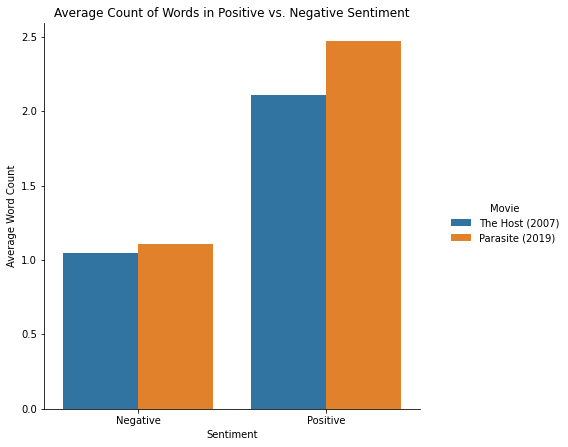

In [97]:
g = sns.catplot(data=valence_df, kind='bar', x='Sentiment', y='Average Word Count', hue='Movie')
g.fig.set_figwidth(8)
g.fig.set_figheight(6)
plt.title('Average Count of Words in Positive vs. Negative Sentiment')

Making sub-plots that fit under either positive valence or negative:

**_Positive_ Valence sub-plots**:

In [98]:
valence_sub_df = emotions_df_long.rename(columns = {'index': 'Movie',
                                                    'Sentiment':'Emotion',
                                                    'value':'Average Word Count'})

In [99]:
pos_df = valence_sub_df[valence_sub_df['Emotion'].isin(['Trust','Surprise','Joy','Anticipation'])]


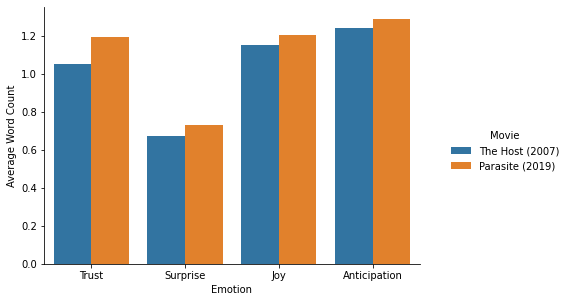

In [100]:
pos = sns.catplot(data=pos_df, kind='bar', x='Emotion', y='Average Word Count', hue='Movie')
pos.fig.set_figwidth(8)
pos.fig.set_figheight(4)

**_Negative_ Valence sub-plots**:

In [101]:
neg_df = valence_sub_df[valence_sub_df['Emotion'].isin(['Fear','Sadness','Anger','Disgust'])]


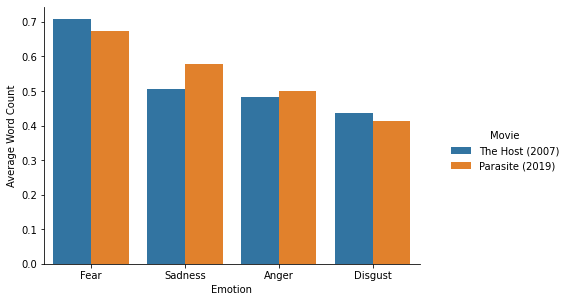

In [102]:
neg = sns.catplot(data=neg_df, kind='bar', x='Emotion', y='Average Word Count', hue='Movie')
neg.fig.set_figwidth(8)
neg.fig.set_figheight(4)

* Note that I might NOT want to display the results in this way (dividing the 8 into positive and negative), because we saw the limitations with NRC EmoLex. It's not actually that clear-cut, i.e. the emotion categories are NOT neatly nested into positive or negative sentiment. But it is a nice way to visualize them. I'm just not sure if it's something I'll include in my final data story.

Showing a general plot with all the sentiments and emotions together:

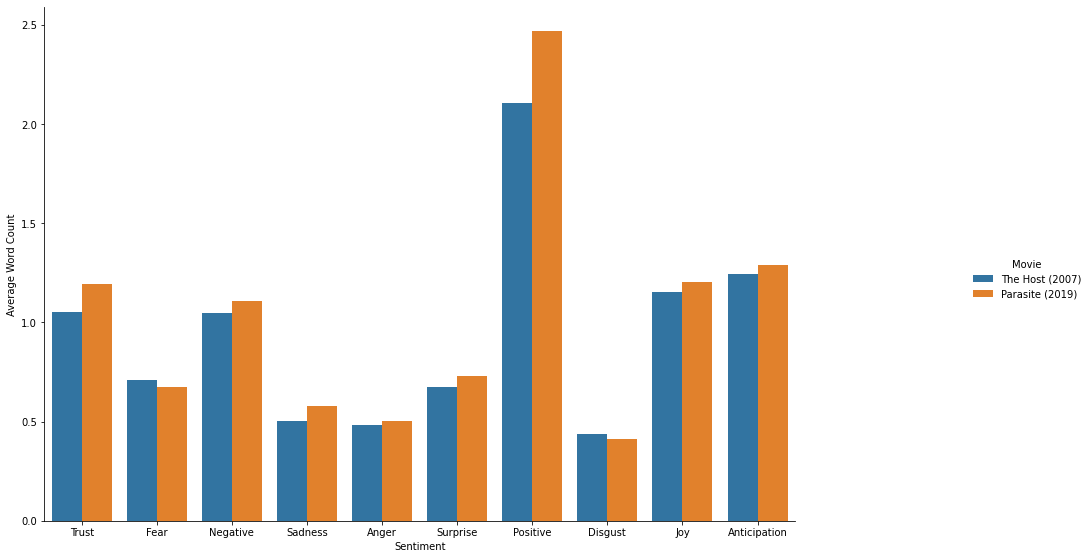

In [103]:
g = sns.catplot(data=emotions_df_long, kind='bar', x='Sentiment', y='Average Word Count', hue='Movie')
g.fig.set_figwidth(16)
g.fig.set_figheight(8)

And this is the other way of organizing the data, into columns organized by the two movies:

<AxesSubplot:>

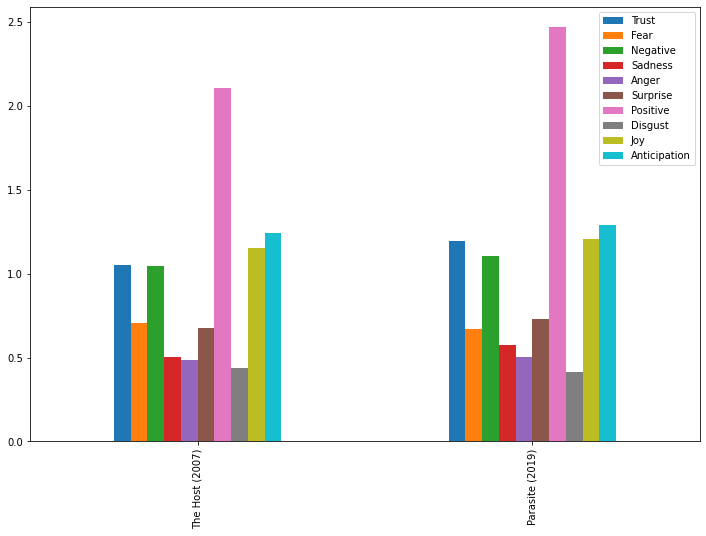

In [104]:
emotions_df.plot(kind='bar', figsize=(12,8))

Adjusting the legend, adding plot title and axis titles, etc. to make it look better:

(array([0, 1]), [Text(0, 0, 'The Host (2007)'), Text(1, 0, 'Parasite (2019)')])

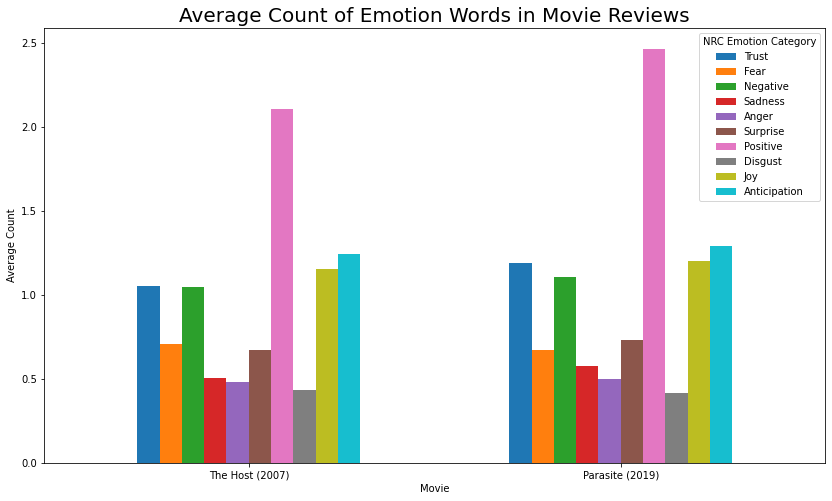

In [105]:
emotions_df.plot(kind='bar', figsize=(14,8), width=0.6)
plt.title('Average Count of Emotion Words in Movie Reviews', fontsize=20)
plt.xlabel('Movie')
plt.ylabel('Average Count')
plt.legend(title='NRC Emotion Category')
plt.xticks(rotation=0)

* Taking out `positive` and `negative` to look only at the 8 emotion categories:

In [106]:
eight_df = valence_sub_df[valence_sub_df['Emotion'].isin(['Fear','Sadness','Anger','Disgust', 'Trust', 'Surprise', 'Joy', 'Anticipation'])]

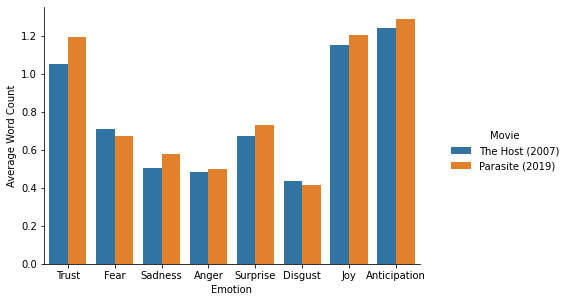

In [107]:
eight = sns.catplot(data=eight_df, kind='bar', x='Emotion', y='Average Word Count', hue='Movie')
eight.fig.set_figwidth(8)
eight.fig.set_figheight(4)

## Which emotions drive negatively rated vs. positively rated user reviews? 

### Looking at the emotion score results between positive and negative ratings

Below, I will run some analyses and make graphs to dive into whether negative emotion words (fear, sadness, anger, disgust) are driven by the negatively rated reviews, and whether positive emotion words (trust, surprise, joy, anticipation) are driven by the positively rated reviews.

I will go through each emotion, divide by review rating and count up the number of words that fall under that emotion according to the rating (positive or negative).

Again, positive ratings are greater than or equal to 4 and negative ratings are less than 3!

#### Looking at `negative` for each movie:

**The Host**

In [108]:
neg_low_host = []
neg_high_host = []

for rev in rt_host_user:
    ncnt = len(rev['negative'])
    if rev['score']<3:
        neg_low_host.append(ncnt)
    if rev['score']>=4:
        neg_high_host.append(ncnt)

In [109]:
# Mean amount of negative emotion words throughout low rated reviews:
avg_neg_low_host = sum(neg_low_host) / len(neg_low_host)

print(avg_neg_low_host)

1.5


In [110]:
# Mean amount of negative emotion words throughout high rated reviews:
avg_neg_high_host = sum(neg_high_host) / len(neg_high_host)

print(avg_neg_high_host)

0.9459119496855346


**Parasite**

In [111]:
neg_low_parasite = []
neg_high_parasite = []

for rev in rt_parasite_user:
    ncnt = len(rev['negative'])
    if rev['score']<3:
        neg_low_parasite.append(ncnt)
    if rev['score']>=4:
        neg_high_parasite.append(ncnt)

In [112]:
# Mean amount of negative emotion words throughout low rated reviews:
avg_neg_low_parasite = sum(neg_low_parasite) / len(neg_low_parasite)

# Mean amount of negative emotion words throughout high rated reviews:
avg_neg_high_parasite = sum(neg_high_parasite) / len(neg_high_parasite)


print(avg_neg_low_parasite)
print(avg_neg_high_parasite)

2.3048327137546467
0.9183556951184699


#### Looking at `positive` for each movie:

In [113]:
pos_low_host = []
pos_high_host = []

for rev in rt_host_user:
    pcnt = len(rev['positive'])
    if rev['score']<3:
        pos_low_host.append(pcnt)
    if rev['score']>=4:
        pos_high_host.append(pcnt)
        
pos_low_parasite = []
pos_high_parasite = []

for rev in rt_parasite_user:
    pcnt = len(rev['positive'])
    if rev['score']<3:
        pos_low_parasite.append(pcnt)
    if rev['score']>=4:
        pos_high_parasite.append(pcnt)

**The Host**

In [114]:
# Mean amount of positive emotion words throughout low rated reviews:
avg_pos_low_host = sum(pos_low_host) / len(pos_low_host)

# Mean amount of positive emotion words throughout high rated reviews:
avg_pos_high_host = sum(pos_high_host) / len(pos_high_host)

print(avg_pos_low_host)
print(avg_pos_high_host)

1.602112676056338
2.1979035639412996


**Parasite**

In [115]:
# Mean amount of positive emotion words throughout low rated reviews:
avg_pos_low_parasite = sum(pos_low_parasite) / len(pos_low_parasite)

# Mean amount of positive emotion words throughout high rated reviews:
avg_pos_high_parasite = sum(pos_high_parasite) / len(pos_high_parasite)

print(avg_pos_low_parasite)
print(avg_pos_high_parasite)

2.3550185873605947
2.5132743362831858


#### Looking at `fear` for each movie:

**The Host**

In [116]:
fear_low_host = []
fear_high_host = []

for rev in rt_host_user:
    fcnt = len(rev['fear'])
    if rev['score']<3:
        fear_low_host.append(fcnt)
    elif rev['score']>=4:
        fear_high_host.append(fcnt)

In [117]:
print(len(fear_low_host))
print(len(fear_high_host))

852
2385


In [118]:
# Mean amount of fear emotion words throughout low rated reviews:
avg_fear_low_host = sum(fear_low_host) / len(fear_low_host)

print(avg_fear_low_host)

0.8039906103286385


In [119]:
# Mean amount of fear emotion words throughout high rated reviews:
avg_fear_high_host = sum(fear_high_host) / len(fear_high_host)

print(avg_fear_high_host)

0.720754716981132


**Parasite**

Same thing with reviews of _Parasite_ and then I will combine the lists to create two lists, with one containing all negatively rated user reviews for both movies and the other containing all positively rated user reviews for both movies.

In [120]:
fear_low_parasite = []
fear_high_parasite = []

for rev in rt_parasite_user:
    fcnt = len(rev['fear'])
    if rev['score']<3:
        fear_low_parasite.append(fcnt)
    elif rev['score']>=4:
        fear_high_parasite.append(fcnt)

In [121]:
# Mean amount of fear emotion words throughout low rated reviews:
avg_fear_low_parasite = sum(fear_low_parasite) / len(fear_low_parasite)

# Mean amount of fear emotion words throughout high rated reviews:
avg_fear_high_parasite = sum(fear_high_parasite) / len(fear_high_parasite)

print(avg_fear_low_parasite)
print(avg_fear_high_parasite)

1.070631970260223
0.6103339994290609


**Looking at `trust` for each movie:**

In [122]:
trust_low_host = []
trust_high_host = []

for rev in rt_host_user:
    tcnt = len(rev['trust'])
    if rev['score']<3:
        trust_low_host.append(tcnt)
    if rev['score']>=4:
        trust_high_host.append(tcnt)

trust_low_parasite = []
trust_high_parasite = []

for rev in rt_parasite_user:
    tcnt = len(rev['trust'])
    if rev['score']<3:
        trust_low_parasite.append(tcnt)
    if rev['score']>=4:
        trust_high_parasite.append(tcnt)

**The Host** 

In [123]:
# Mean amount of trust emotion words throughout low rated reviews:
avg_trust_low_host = sum(trust_low_host) / len(trust_low_host)

# Mean amount of trust emotion words throughout high rated reviews:
avg_trust_high_host = sum(trust_high_host) / len(trust_high_host)

print(avg_trust_low_host)
print(avg_trust_high_host)

0.7969483568075117
1.1039832285115303


**Parasite**

In [124]:
# Mean amount of trust emotion words throughout low rated reviews:
avg_trust_low_parasite = sum(trust_low_parasite) / len(trust_low_parasite)

# Mean amount of trust emotion words throughout high rated reviews:
avg_trust_high_parasite = sum(trust_high_parasite) / len(trust_high_parasite)

print(avg_trust_low_parasite)
print(avg_trust_high_parasite)

1.2360594795539033
1.1861261775620897


**Looking at `sadness` for each movie:**

In [125]:
sad_low_host = []
sad_high_host = []

for rev in rt_host_user:
    scnt = len(rev['sadness'])
    if rev['score']<3:
        sad_low_host.append(scnt)
    if rev['score']>=4:
        sad_high_host.append(scnt)
        
sad_low_parasite = []
sad_high_parasite = []

for rev in rt_parasite_user:
    scnt = len(rev['sadness'])
    if rev['score']<3:
        sad_low_parasite.append(scnt)
    if rev['score']>=4:
        sad_high_parasite.append(scnt)

**The Host**

In [126]:
# Mean amount of sadness emotion words throughout low rated reviews:
avg_sad_low_host = sum(sad_low_host) / len(sad_low_host)

# Mean amount of sadness emotion words throughout high rated reviews:
avg_sad_high_host = sum(sad_high_host) / len(sad_high_host)

print(avg_sad_low_host)
print(avg_sad_high_host)

0.7382629107981221
0.4389937106918239


**Parasite**

In [127]:
# Mean amount of sadness emotion words throughout low rated reviews:
avg_sad_low_parasite = sum(sad_low_parasite) / len(sad_low_parasite)

# Mean amount of sadness emotion words throughout high rated reviews:
avg_sad_high_parasite = sum(sad_high_parasite) / len(sad_high_parasite)

print(avg_sad_low_parasite)
print(avg_sad_high_parasite)

1.1970260223048328
0.48015986297459323


**Looking at `anger` for each movie:**

In [128]:
anger_low_host = []
anger_high_host = []

for rev in rt_host_user:
    acnt = len(rev['anger'])
    if rev['score']<3:
        anger_low_host.append(acnt)
    if rev['score']>=4:
        anger_high_host.append(acnt)
        
anger_low_parasite = []
anger_high_parasite = []

for rev in rt_parasite_user:
    acnt = len(rev['anger'])
    if rev['score']<3:
        anger_low_parasite.append(acnt)
    if rev['score']>=4:
        anger_high_parasite.append(acnt)

**The Host**

In [129]:
# Mean amount of anger emotion words throughout low rated reviews:
avg_anger_low_host = sum(anger_low_host) / len(anger_low_host)

# Mean amount of anger emotion words throughout high rated reviews:
avg_anger_high_host = sum(anger_high_host) / len(anger_high_host)

print(avg_anger_low_host)
print(avg_anger_high_host)

0.6983568075117371
0.429769392033543


**Parasite**

In [130]:
# Mean amount of anger emotion words throughout low rated reviews:
avg_anger_low_parasite = sum(anger_low_parasite) / len(anger_low_parasite)

# Mean amount of anger emotion words throughout high rated reviews:
avg_anger_high_parasite = sum(anger_high_parasite) / len(anger_high_parasite)

print(avg_anger_low_parasite)
print(avg_anger_high_parasite)

1.0353159851301115
0.4216385954895804


**Looking at `surprise` for each movie:**

In [131]:
surprise_low_host = []
surprise_high_host = []

for rev in rt_host_user:
    s_cnt = len(rev['surprise'])
    if rev['score']<3:
        surprise_low_host.append(s_cnt)
    if rev['score']>=4:
        surprise_high_host.append(s_cnt)
        
surprise_low_parasite = []
surprise_high_parasite = []

for rev in rt_parasite_user:
    s_cnt = len(rev['surprise'])
    if rev['score']<3:
        surprise_low_parasite.append(s_cnt)
    if rev['score']>=4:
        surprise_high_parasite.append(s_cnt)

**The Host**

In [132]:
# Mean amount of surprise emotion words throughout low rated reviews:
avg_surprise_low_host = sum(surprise_low_host) / len(surprise_low_host)

# Mean amount of surprise emotion words throughout high rated reviews:
avg_surprise_high_host = sum(surprise_high_host) / len(surprise_high_host)

print(avg_surprise_low_host)
print(avg_surprise_high_host)

0.4612676056338028
0.7333333333333333


**Parasite**

In [133]:
# Mean amount of surprise emotion words throughout low rated reviews:
avg_surprise_low_parasite = sum(surprise_low_parasite) / len(surprise_low_parasite)

# Mean amount of surprise emotion words throughout high rated reviews:
avg_surprise_high_parasite = sum(surprise_high_parasite) / len(surprise_high_parasite)

print(avg_surprise_low_parasite)
print(avg_surprise_high_parasite)

0.7323420074349443
0.7273765343990864


**Looking at `disgust` for each movie:**

In [134]:
disgust_low_host = []
disgust_high_host = []

for rev in rt_host_user:
    dcnt = len(rev['disgust'])
    if rev['score']<3:
        disgust_low_host.append(dcnt)
    if rev['score']>=4:
        disgust_high_host.append(dcnt)
        
disgust_low_parasite = []
disgust_high_parasite = []

for rev in rt_parasite_user:
    dcnt = len(rev['disgust'])
    if rev['score']<3:
        disgust_low_parasite.append(dcnt)
    if rev['score']>=4:
        disgust_high_parasite.append(dcnt)

**The Host**

In [135]:
# Mean amount of disgust emotion words throughout low rated reviews:
avg_disgust_low_host = sum(disgust_low_host) / len(disgust_low_host)

# Mean amount of disgust emotion words throughout high rated reviews:
avg_disgust_high_host = sum(disgust_high_host) / len(disgust_high_host)

print(avg_disgust_low_host)
print(avg_disgust_high_host)

0.7018779342723005
0.3589098532494759


**Parasite**

In [136]:
# Mean amount of disgust emotion words throughout low rated reviews:
avg_disgust_low_parasite = sum(disgust_low_parasite) / len(disgust_low_parasite)

# Mean amount of disgust emotion words throughout high rated reviews:
avg_disgust_high_parasite = sum(disgust_high_parasite) / len(disgust_high_parasite)

print(avg_disgust_low_parasite)
print(avg_disgust_high_parasite)

1.087360594795539
0.3074507564944333


**Looking at `joy` for each movie:**

In [137]:
joy_low_host = []
joy_high_host = []

for rev in rt_host_user:
    jcnt = len(rev['joy'])
    if rev['score']<3:
        joy_low_host.append(jcnt)
    if rev['score']>=4:
        joy_high_host.append(jcnt)
        
joy_low_parasite = []
joy_high_parasite = []

for rev in rt_parasite_user:
    jcnt = len(rev['joy'])
    if rev['score']<3:
        joy_low_parasite.append(jcnt)
    if rev['score']>=4:
        joy_high_parasite.append(jcnt)

**The Host**

In [138]:
# Mean amount of joy emotion words throughout low rated reviews:
avg_joy_low_host = sum(joy_low_host) / len(joy_low_host)

# Mean amount of disgust emotion words throughout high rated reviews:
avg_joy_high_host = sum(joy_high_host) / len(joy_high_host)

print(avg_joy_low_host)
print(avg_joy_high_host)

0.8415492957746479
1.2268343815513627


**Parasite**

In [139]:
# Mean amount of joy emotion words throughout low rated reviews:
avg_joy_low_parasite = sum(joy_low_parasite) / len(joy_low_parasite)

# Mean amount of disgust emotion words throughout high rated reviews:
avg_joy_high_parasite = sum(joy_high_parasite) / len(joy_high_parasite)

print(avg_joy_low_parasite)
print(avg_joy_high_parasite)

1.050185873605948
1.2320867827576363


**Looking at `anticipation` for each movie:**

In [140]:
ant_low_host = []
ant_high_host = []

for rev in rt_host_user:
    a_cnt = len(rev['anticipation'])
    if rev['score']<3:
        ant_low_host.append(a_cnt)
    if rev['score']>=4:
        ant_high_host.append(a_cnt)
        
ant_low_parasite = []
ant_high_parasite = []

for rev in rt_parasite_user:
    a_cnt = len(rev['anticipation'])
    if rev['score']<3:
        ant_low_parasite.append(a_cnt)
    if rev['score']>=4:
        ant_high_parasite.append(a_cnt)

**The Host**

In [141]:
# Mean amount of anticipation emotion words throughout low rated reviews:
avg_ant_low_host = sum(ant_low_host) / len(ant_low_host)

# Mean amount of anticipation emotion words throughout high rated reviews:
avg_ant_high_host = sum(ant_high_host) / len(ant_high_host)

print(avg_ant_low_host)
print(avg_ant_high_host)

0.9823943661971831
1.2465408805031446


**Parasite**

In [142]:
# Mean amount of anticipation emotion words throughout low rated reviews:
avg_ant_low_parasite = sum(ant_low_parasite) / len(ant_low_parasite)

# Mean amount of anticipation emotion words throughout high rated reviews:
avg_ant_high_parasite = sum(ant_high_parasite) / len(ant_high_parasite)

print(avg_ant_low_parasite)
print(avg_ant_high_parasite)

1.3438661710037174
1.284613188695404


* Not sure if this is a visualization I want to include, but it's intriguing to get a sense of whether there's a difference between how words are grouped into the emotion and sentiment categories, according to the scored rating of the review:

In [143]:
emotions_by_rating = {
    'Trust': [avg_trust_high_host, avg_trust_low_host, avg_trust_high_parasite, avg_trust_low_parasite],
    'Fear': [avg_fear_high_host, avg_fear_low_host, avg_fear_high_parasite, avg_fear_low_parasite],
    'Negative' : [avg_neg_high_host, avg_neg_low_host, avg_neg_high_parasite, avg_neg_low_parasite],
    'Sadness' : [avg_sad_high_host, avg_sad_low_host, avg_sad_high_parasite, avg_sad_low_parasite],
    'Anger' : [avg_anger_high_host, avg_anger_low_host, avg_anger_high_parasite, avg_anger_low_parasite],
    'Surprise' : [avg_surprise_high_host, avg_surprise_low_host, avg_surprise_high_parasite, avg_surprise_low_parasite],
    'Positive' : [avg_pos_high_host, avg_pos_low_host, avg_pos_high_parasite, avg_pos_low_parasite],
    'Disgust' : [avg_disgust_high_host, avg_disgust_low_host, avg_disgust_high_parasite, avg_disgust_low_parasite],
    'Joy' : [avg_joy_high_host, avg_joy_low_host, avg_joy_high_parasite, avg_joy_low_parasite],
    'Anticipation' : [avg_ant_high_host, avg_ant_low_host, avg_ant_high_parasite, avg_ant_low_parasite]
        }

emotions_by_rating_df = pd.DataFrame(emotions_by_rating, 
                           columns = ['Trust', 'Fear', 'Negative', 'Sadness', 'Anger', 'Surprise', 'Positive', 'Disgust', 'Joy', 'Anticipation'], 
                           index=['The Host (Positive Rating)', 'The Host (Negative Rating)','Parasite (Positive Rating)','Parasite (Negative Rating)'])


In [144]:
emotions_by_rating_df

,Trust,Fear,Negative,Sadness,Anger,Surprise,Positive,Disgust,Joy,Anticipation
The Host (Positive Rating),1.103983,0.720755,0.945912,0.438994,0.429769,0.733333,2.197904,0.358910,1.226834,1.246541
The Host (Negative Rating),0.796948,0.803991,1.500000,0.738263,0.698357,0.461268,1.602113,0.701878,0.841549,0.982394
Parasite (Positive Rating),1.186126,0.610334,0.918356,0.480160,0.421639,0.727377,2.513274,0.307451,1.232087,1.284613
Parasite (Negative Rating),1.236059,1.070632,2.304833,1.197026,1.035316,0.732342,2.355019,1.087361,1.050186,1.343866


In [145]:
rating_df_long = emotions_by_rating_df.melt()

In [146]:
rating_df_long

,variable,value
0,Trust,1.103983
1,Trust,0.796948
2,Trust,1.186126
3,Trust,1.236059
4,Fear,0.720755
5,Fear,0.803991
6,Fear,0.610334
7,Fear,1.070632
8,Negative,0.945912
9,Negative,1.500000


In [147]:
rating_df_long = emotions_by_rating_df.reset_index().melt(id_vars=['index'])

In [148]:
rating_df_long = rating_df_long.rename(columns = {'index': 'Movie (Rating)',
                                                  'variable':'Sentiment',
                                                  'value':'Average Word Count'})

In [149]:
valence_rating_df = rating_df_long[rating_df_long['Sentiment'].isin(['Positive','Negative'])]


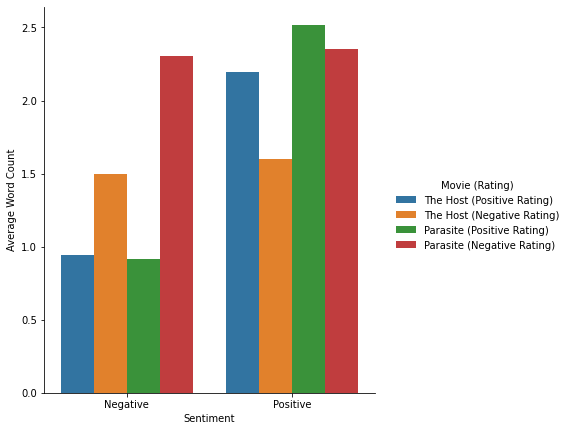

In [150]:
graph = sns.catplot(data=valence_rating_df, kind='bar', x='Sentiment', y='Average Word Count', hue='Movie (Rating)')
graph.fig.set_figwidth(8)
graph.fig.set_figheight(6)

## Conclusion

In this notebook, we went through the bulk of my project, which is on sentiment analysis. We used VADER, NRC VAD Lexicon, and NRC Emotion Lexicon, which were all useful for different reasons when we're trying to understand the general sentiment behind corpora. However, along the way, I found that each tool/lexicon has its own limitations. 

But overall, this was an awesome way to gauge the sentiment behind the movie reviews from RT. The main takeaway to understand is that in general, _Parasite_ is indeed more well-received: more positive reviews, higher sentiment scores. It was also quite fascinating to look specifically at what reviewers are saying; looking through which words were driving each emotion category. 

With that, I'm very excited to weave together a narrative about my research and hopefully produce an entertaining, thoughtful, engaging story about my data and analysis! Thanks for sticking with me, and please go check out my other notebooks to see what else I did for my project.